# COVID19 England rate of deaths aged over 70

Get the data from the official UK repository and drop the columns we are not interested in.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv"
df = pd.read_csv(url, parse_dates=['date']).drop(['areaType', 'areaCode', 'areaName', 'metric', 'rollingRate', 'rollingSum'], 1)


Remove existing aggregated data, so that we can make our own aggregations. Have a look at the daily data.

In [2]:
df = df[~df.age.isin(['00_59', '60+'])]

df[df.date.eq('2021-01-01')]

,date,age,deaths
714,2021-01-01,00_04,0
715,2021-01-01,10_14,0
716,2021-01-01,15_19,0
717,2021-01-01,20_24,0
718,2021-01-01,25_29,0
719,2021-01-01,30_34,6
720,2021-01-01,35_39,4
721,2021-01-01,40_44,1
722,2021-01-01,45_49,9
723,2021-01-01,50_54,6


In [3]:
sns.set_theme()
figsize=(20,10)
# plt.subplots(figsize=figsize)
# sns.lineplot(data=df.groupby('date').sum())

<AxesSubplot:xlabel='date'>

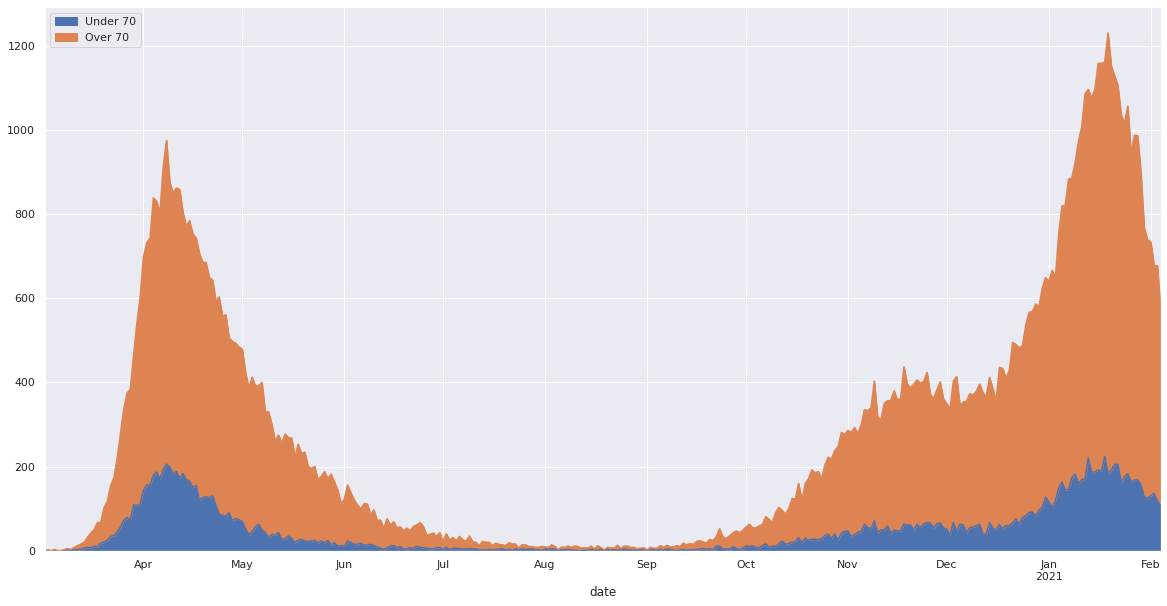

In [4]:
under70 = ['00_04', '05_09', '10_14', '15_19', '20_24', '25_29', '30_34', '35_39', 
           '40_44', '45_49', '50_54', '55_59', '60_64', '65_69']
over70 = ['70_74', '75_79', '80_84', '85_89', '90+']

u=df[df.age.isin(under70)].groupby('date').sum()
o=df[df.age.isin(over70)].groupby('date').sum()
series = pd.concat([
    u.rename(columns={'deaths': 'Under 70'}),
    o.rename(columns={'deaths': 'Over 70'})], 
    axis=1)

series.plot.area(figsize=figsize)

<AxesSubplot:xlabel='date'>

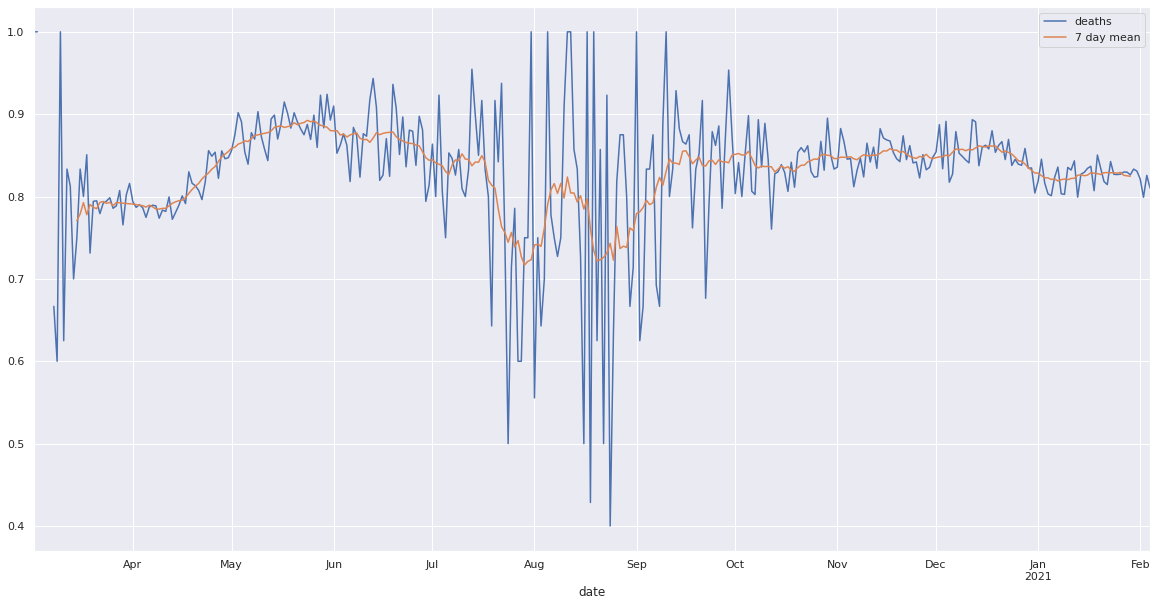

In [5]:
rate=o/(u+o)
rate['14 day mean'] = rate.rolling(14, center=True).mean()
rate.plot(figsize=figsize)

<AxesSubplot:xlabel='date'>

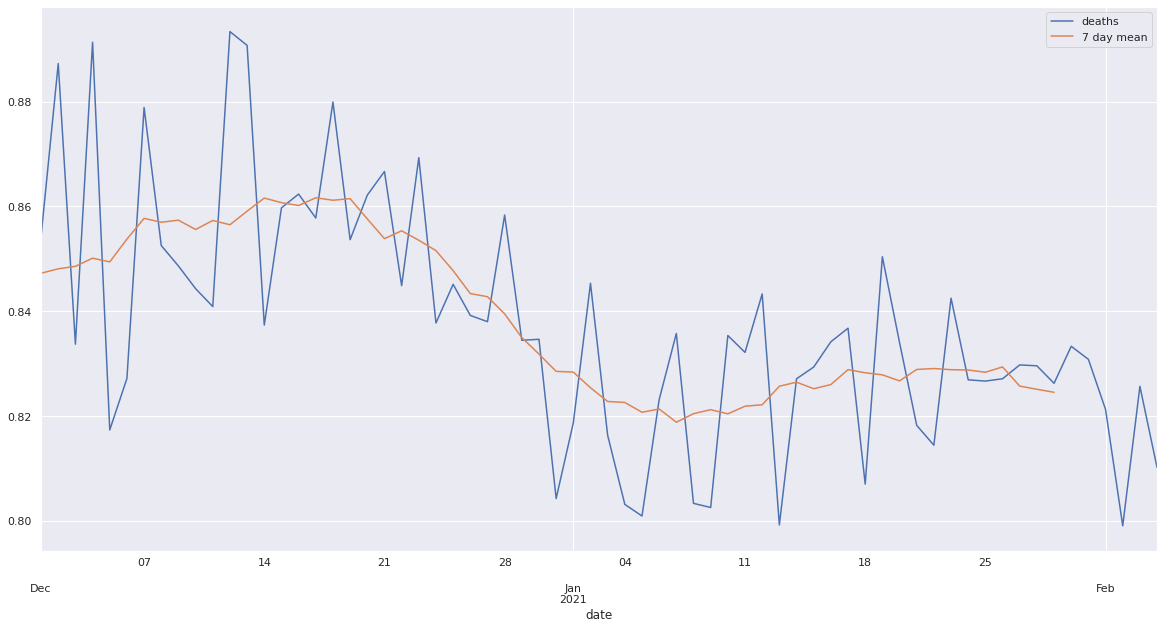

In [6]:
rate = rate[rate.index>='2020-12-01']
rate.plot(figsize=figsize)